## Assignment 0

### Question 1

In [2]:
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

In [3]:
path = './power.mat'
data = io.loadmat(path)

TtestResult(statistic=-2.0286261238127428, pvalue=0.0433823887687935, df=299)


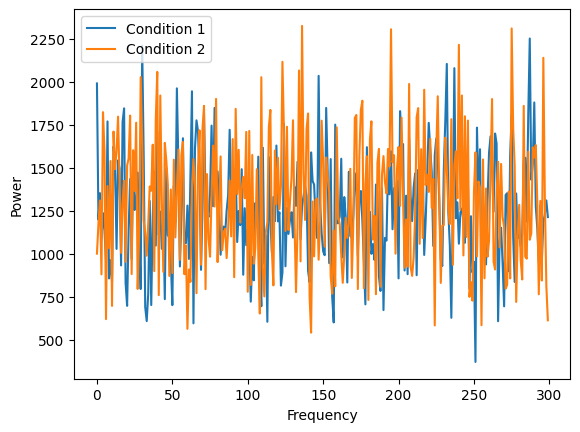

In [4]:
data['Power'].shape
#rows are trials, columns are success and failure conditions
power_spec_c1 = data['Power'][0]
power_spec_c2 = data['Power'][1]

print(ttest_rel(power_spec_c1, power_spec_c2))

ttest_rel = np.mean(power_spec_c1-power_spec_c2)/np.sqrt(np.var(power_spec_c1-power_spec_c2)/len(power_spec_c1))

# If we observe a large p-value, for example greater than 0.05 or 0.1 then we cannot reject the null hypothesis of identical average scores. 
# If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages. 
# Small p-values are associated with large t-statistics.

plt.plot(power_spec_c1, label='Condition 1')
plt.plot(power_spec_c2, label='Condition 2')

plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend()
plt.show()

Here p-value is less than 0.05, thus we reject the null hypothesis and conclude that the mean of the two samples at two different conditions are different.

### Question 2

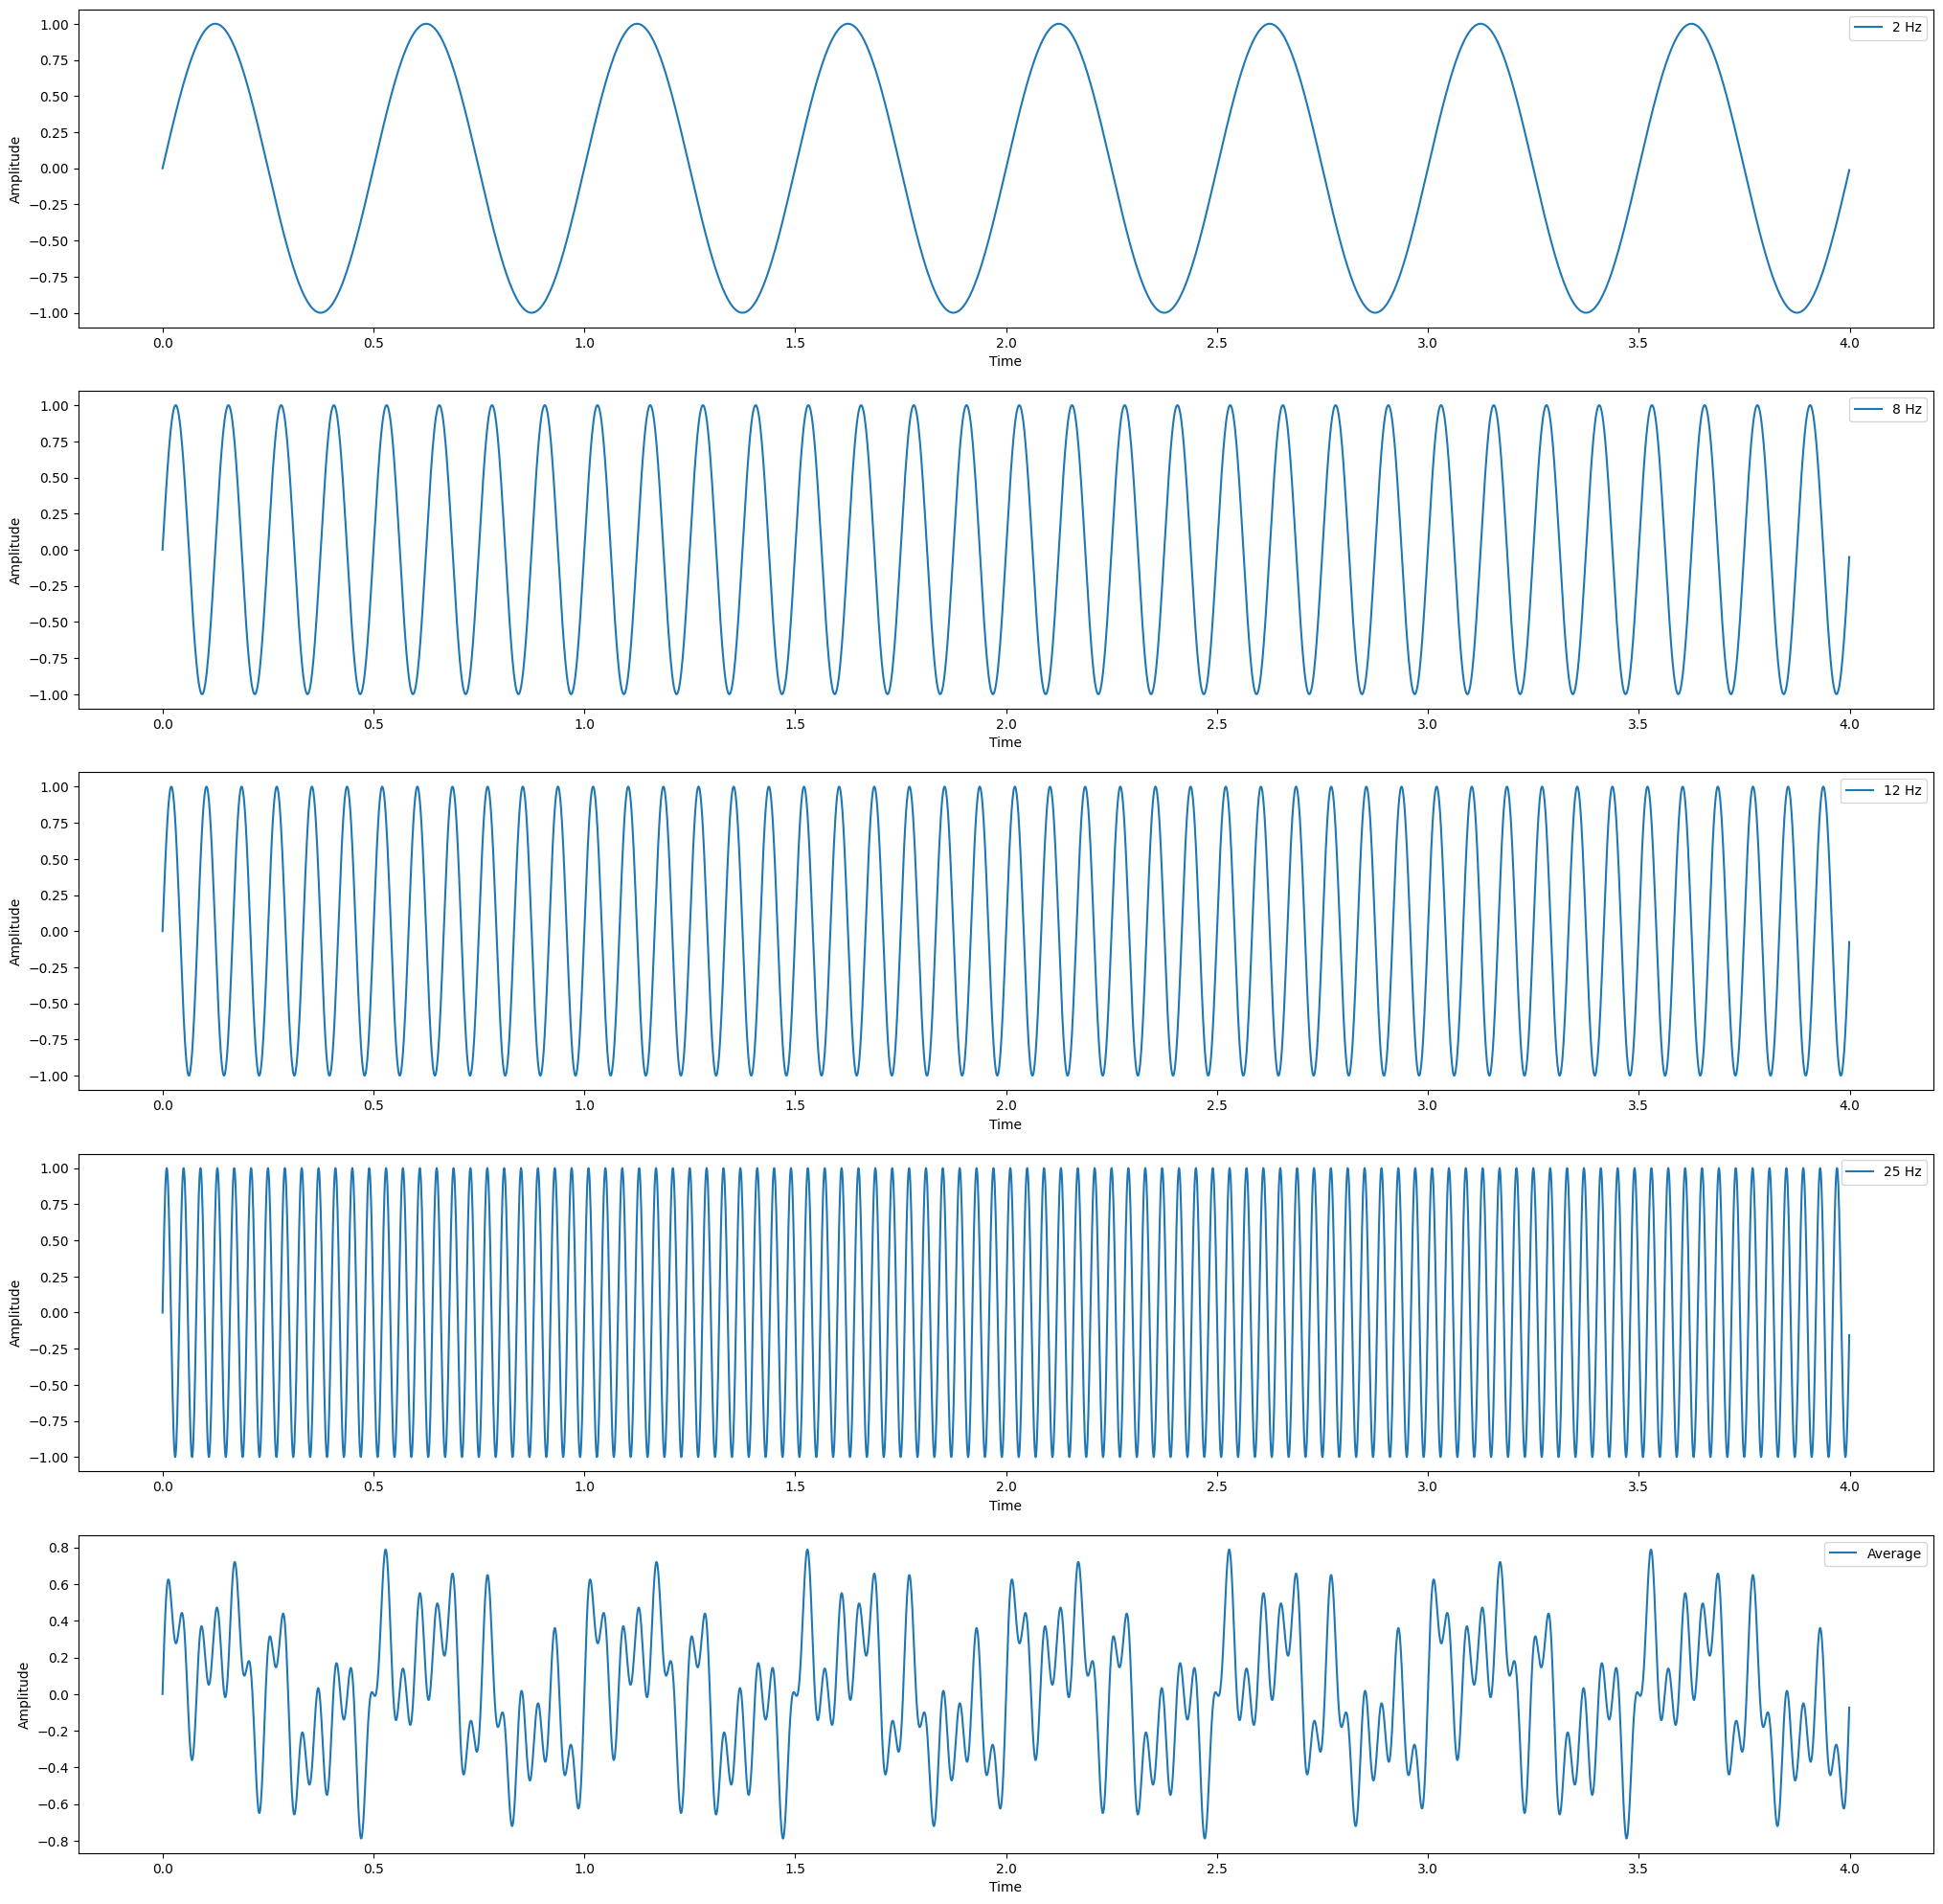

It is difficult to estimate the frequencies involved in the average wave.
We can use fourier decomposition to estimate the frequencies involved in the average wave.


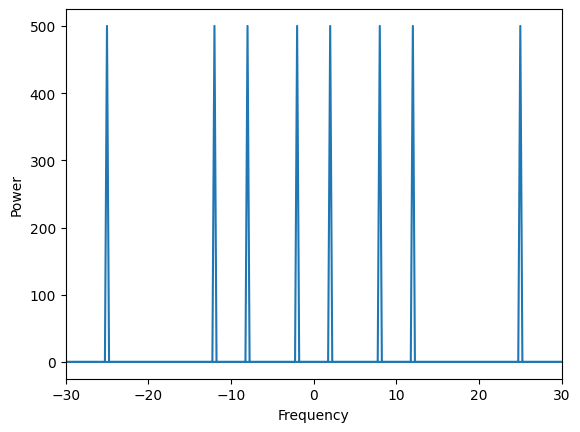

In [6]:
time = np.arange(0, 4, 0.001)
freq_axis = np.fft.fftfreq(len(time), 0.001)
freqs = [2, 8, 12, 25]
amps = [1, 1, 1, 1]

sines = []
for i in range(len(freqs)):
    sines.append(amps[i]*np.sin(2*np.pi*freqs[i]*time))

plt.figure(figsize=(25, 25))
for i in range(len(freqs)):
    plt.subplot(511+i)
    plt.plot(time, sines[i], label=str(freqs[i])+' Hz')
    plt.xlabel('Time')
    plt.ylabel('Amplitude') 
    plt.legend()
avg_wave = np.mean(sines, axis=0)
plt.subplot(515)
plt.plot(time, avg_wave, label='Average')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

print('It is difficult to estimate the frequencies involved in the average wave.')
print('We can use fourier decomposition to estimate the frequencies involved in the average wave.')
#plot frequency spectrum of each avg_wave
avg_wave_fft = np.fft.fft(avg_wave)
plt.plot(freq_axis, np.abs(avg_wave_fft))
plt.xlim(-max(freqs)-5, max(freqs)+5)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()


### Question 3

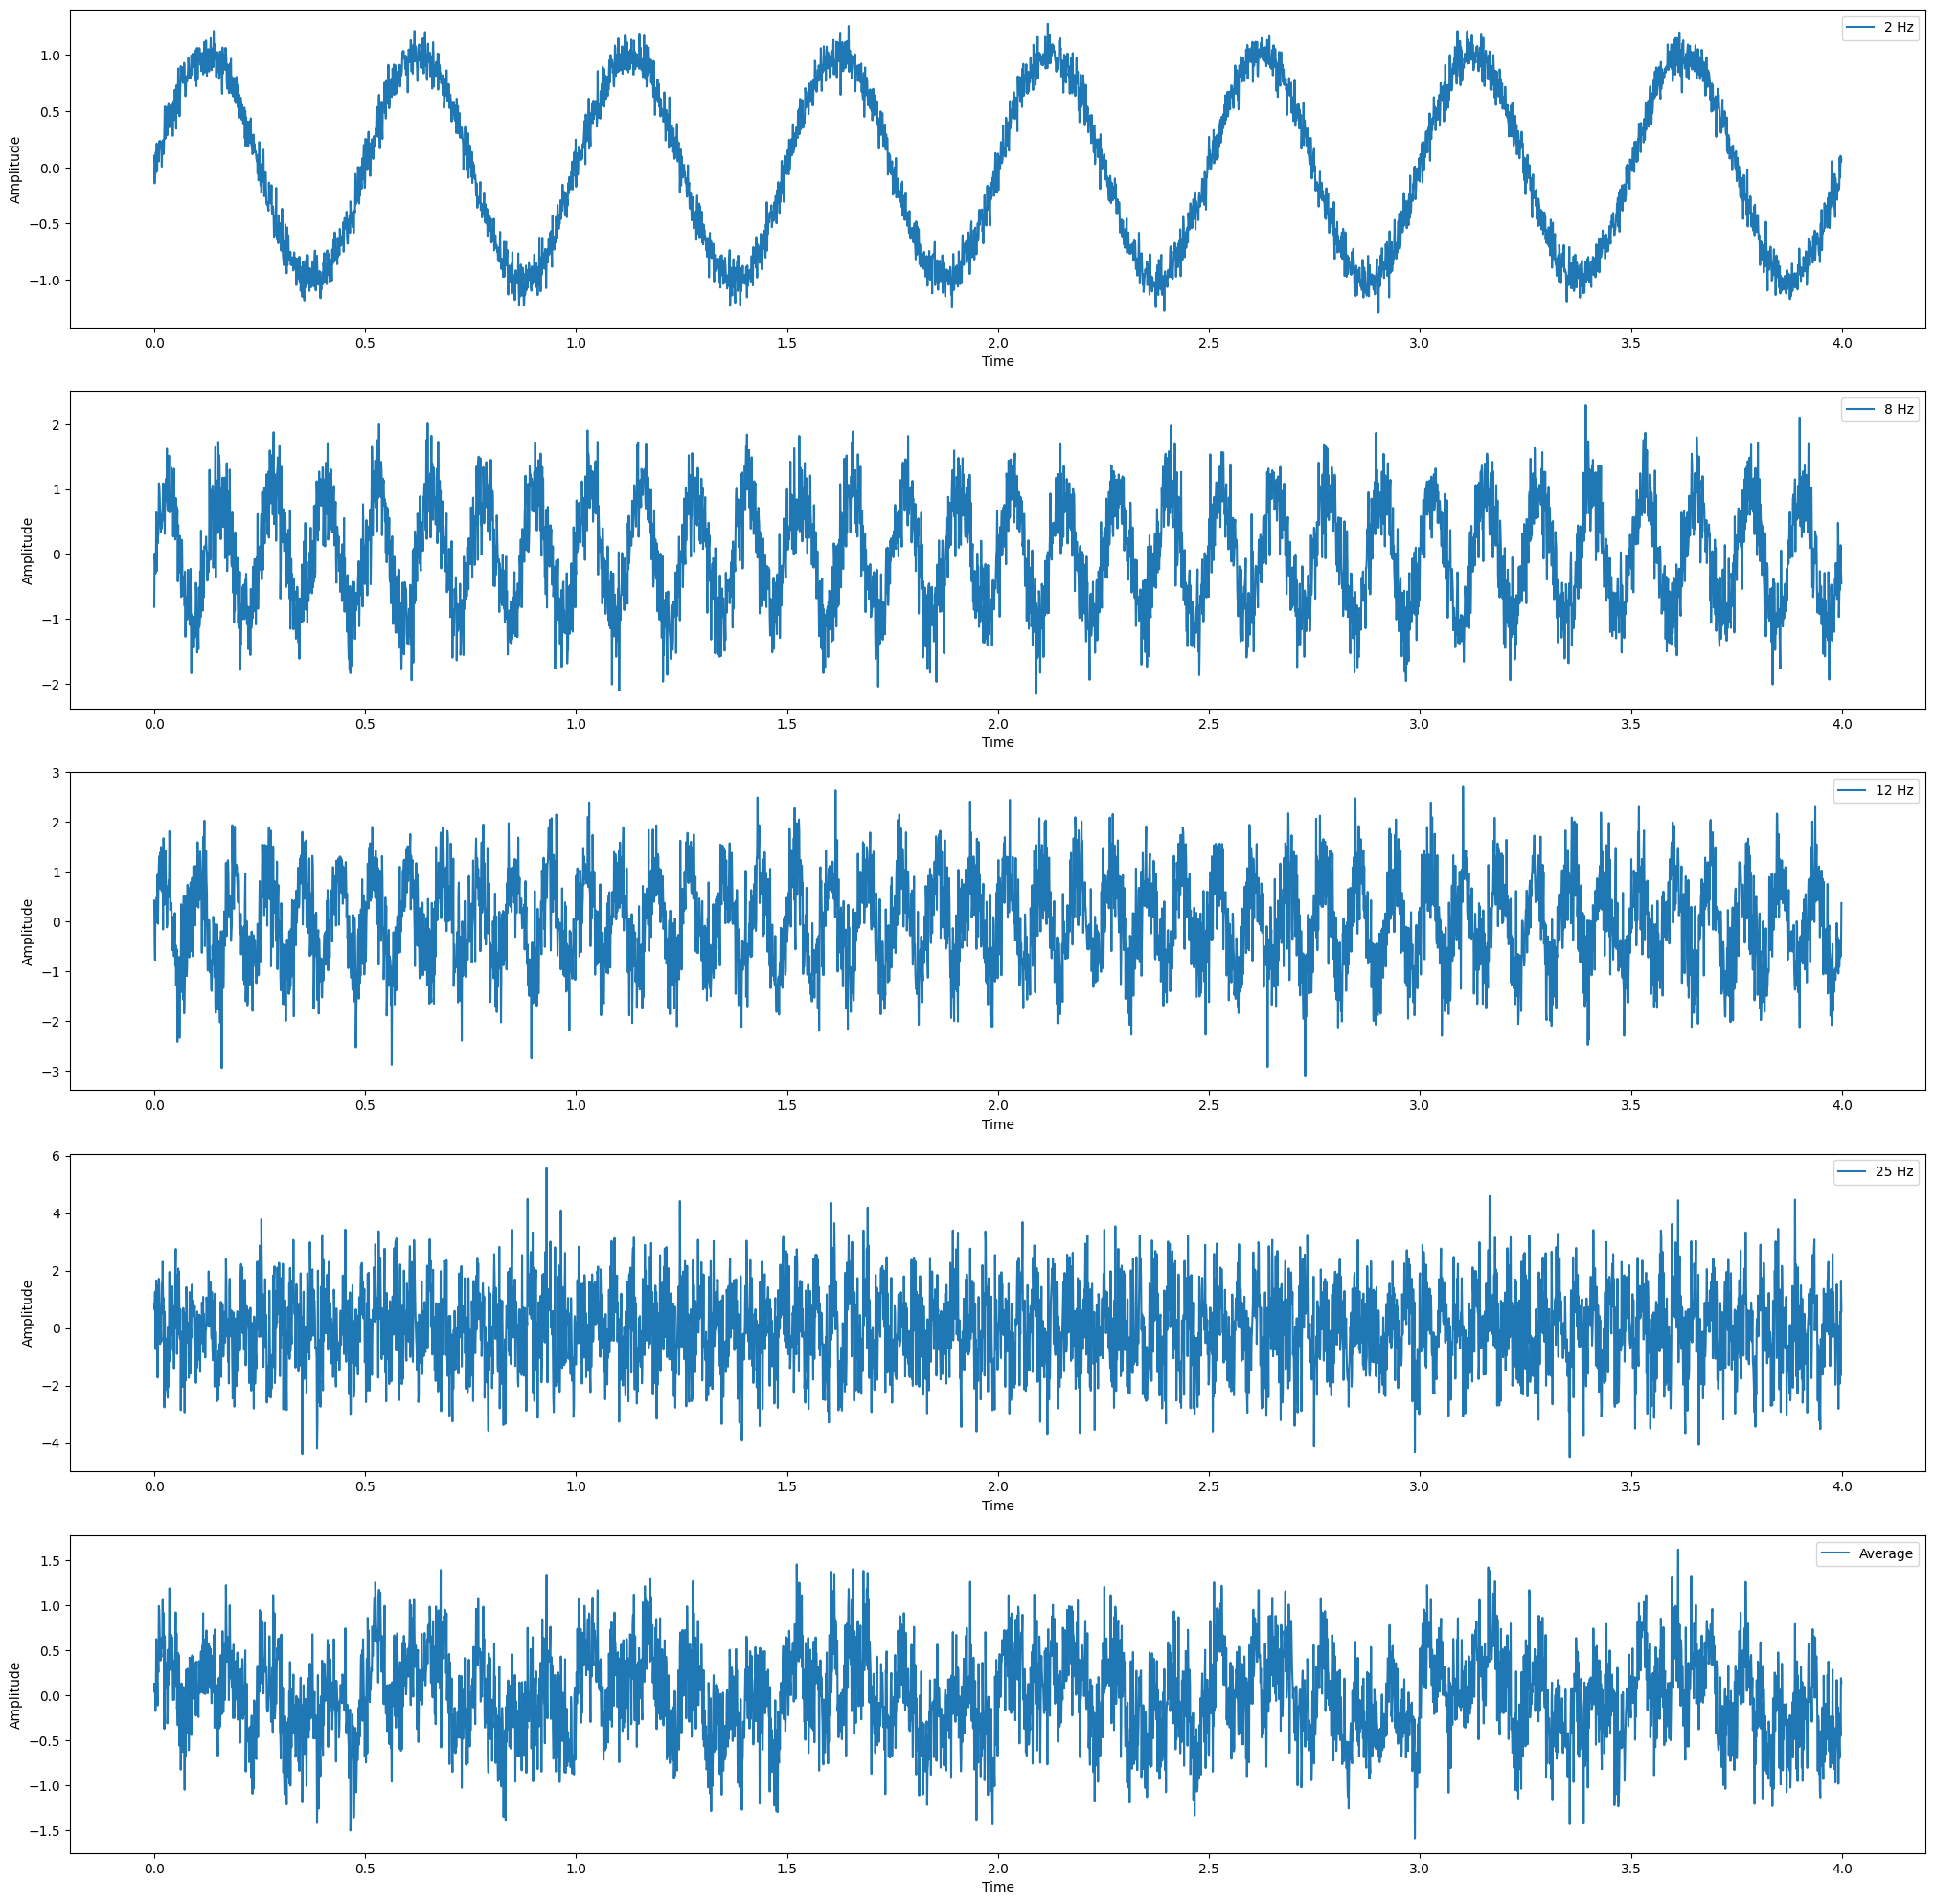

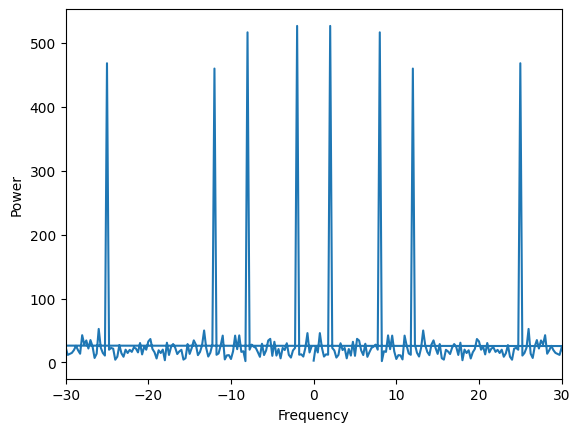

In [9]:
time = np.arange(0, 4, 0.001)
freq_axis = np.fft.fftfreq(len(time), 0.001)
freqs = [2, 8, 12, 25]
amps = [1, 1, 1, 1]
noise_amps = [0.2, 0.8, 1.2, 2.5]

sines = []
for i in range(len(freqs)):
    sines.append(amps[i]*np.sin(2*np.pi*freqs[i]*time)+noise_amps[i]*np.random.normal(0, 0.5, len(time)))

plt.figure(figsize=(25, 25))
for i in range(len(freqs)):
    plt.subplot(511+i)
    plt.plot(time, sines[i], label=str(freqs[i])+' Hz')
    plt.xlabel('Time')
    plt.ylabel('Amplitude') 
    plt.legend()
avg_wave = np.mean(sines, axis=0)
plt.subplot(515)
plt.plot(time, avg_wave, label='Average')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

#plot frequency spectrum of each avg_wave
avg_wave_fft = np.fft.fft(avg_wave)
plt.plot(freq_axis, np.abs(avg_wave_fft))
plt.xlim(-max(freqs)-5, max(freqs)+5)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()


Adding different amount of noise to the data, we can see that the sine waves become more jittery. Moreover the average wave looks does not look like average wave above. But the frequency domain analysis are distinctly able to identify the frequencies for the given amplitude values.